## t-SNE Example in Scikit-Learn

In the Python example, we will generate classification data, perform PCA and t-SNE, and visualize the results. For performing dimensionality reduction, we will use Scikit-Learn, and for visualization, we will use Plotly Express. 

### Generating Classification Dataset
We will use Scikit-Learn’s ``make_classification`` function to generate synthetic data with 6 features, 1500 samples, and 3 classes. 

After that, we will 3D plot the first three features of the data using the Plotly Expr````s scatte````3d functnio. 

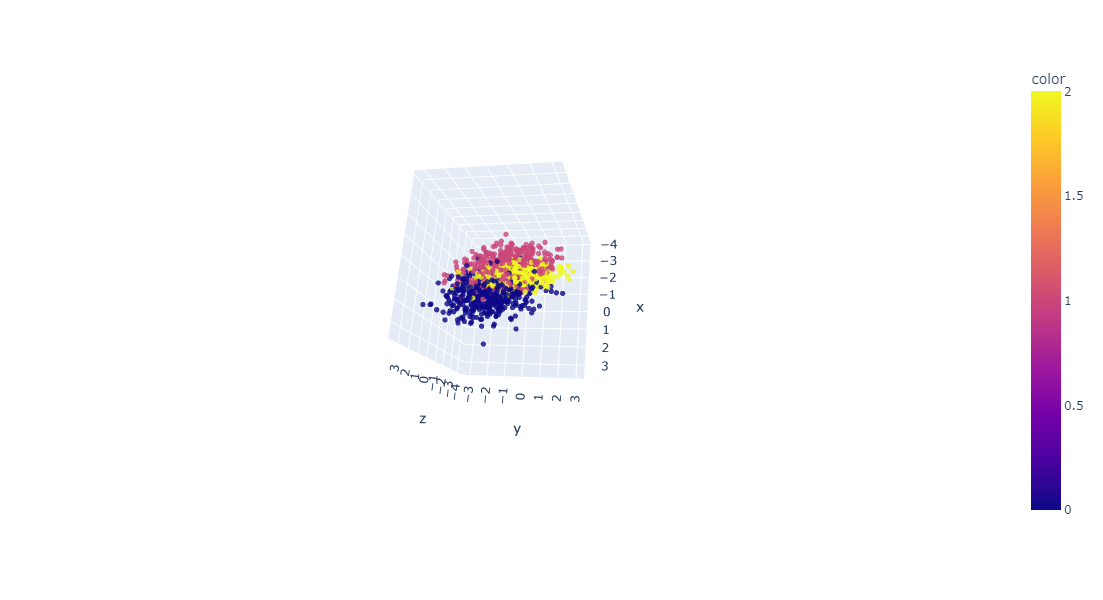

In [4]:
import plotly.express as px
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=1500,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.8, width=800, height=600)
fig.update_traces(marker_size=3)
fig.show()

### Test plain-old PCA
We will now apply the PCA algorithm on the dataset to return two PCA components. The ``fit_transform`` learns and transforms the dataset at the same time.  

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

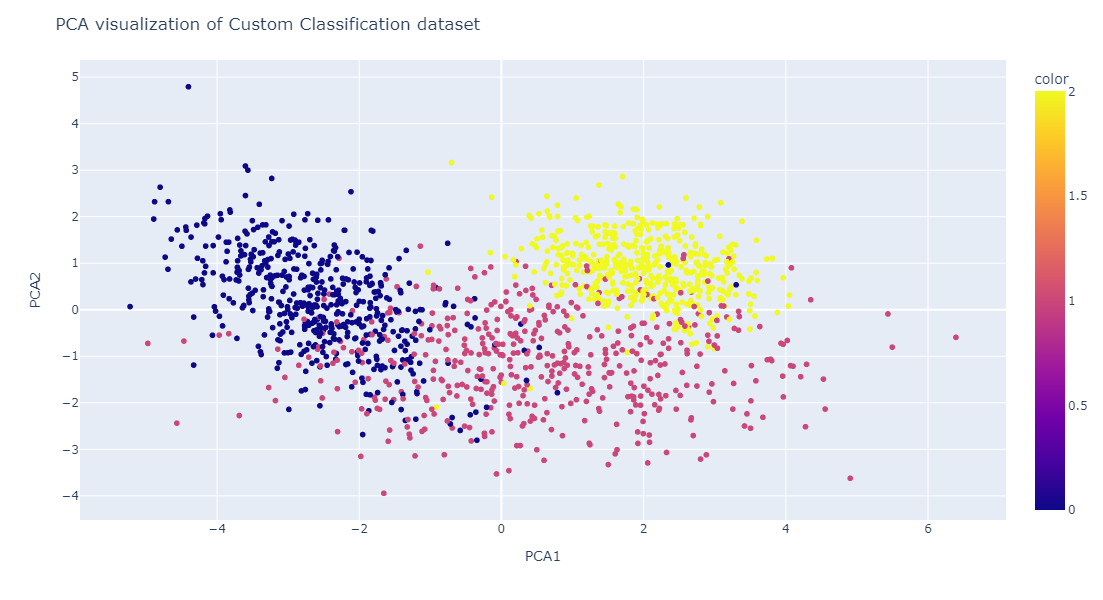

In [6]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y, width=800, height=600)
fig.update_layout(
    title="PCA visualization of Custom Classification dataset",
    xaxis_title="PCA1",
    yaxis_title="PCA2",
)
fig.show()

### Compare with t-SNE
Now we will apply the t-SNE algorithm to the dataset and compare the results. 

After fitting and transforming data, we will displa**y Kullback-Leibler (K**L) divergence between the high-dimensional probability distribution and the low-dimensional probability distributio**

Low KL divergence is a sign** of betterues****lts.

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=1000, early_exaggeration=12, random_state=1, n_jobs=-1)
X_tsne = tsne.fit_transform(X)
tsne.kl_divergence_

0.057431623339653015

Similar to PCA, we will visualize two t-SNE components on a scatter plot. 

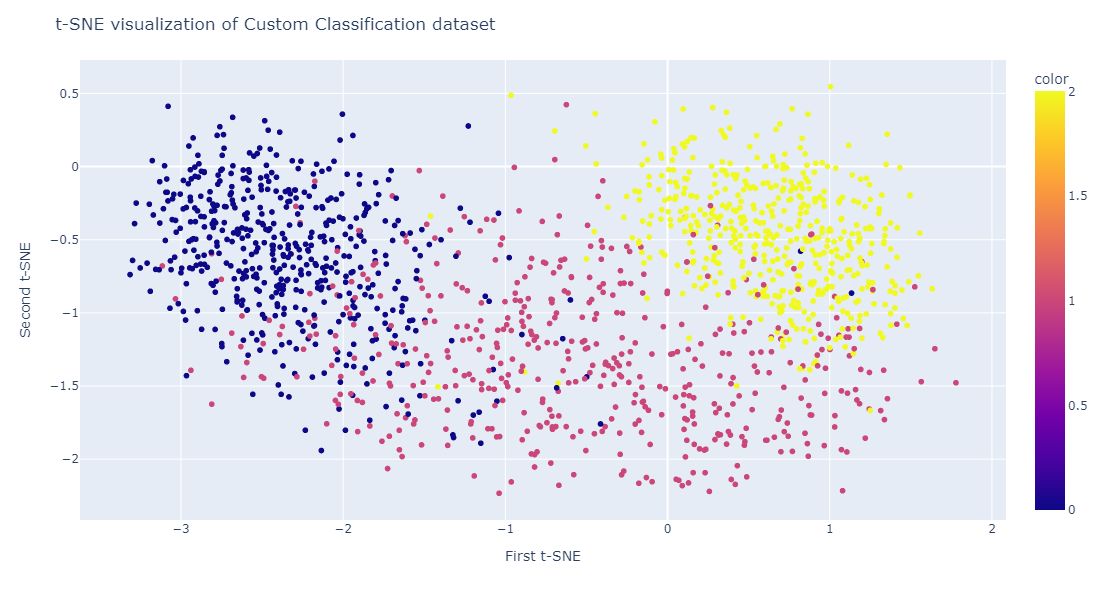

In [28]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y, width=800, height=600)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

The result is quite better than PCA. We can clearly see **three big clusters** :) 

### Example: Churn Dataset

In [29]:
import pandas as pd

df = pd.read_csv("customer_churn.csv")
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [30]:
df['Churn'].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

#### With PCA

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_norm,y,
                                   random_state=13, 
                                   test_size=0.25, 
                                   shuffle=True)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

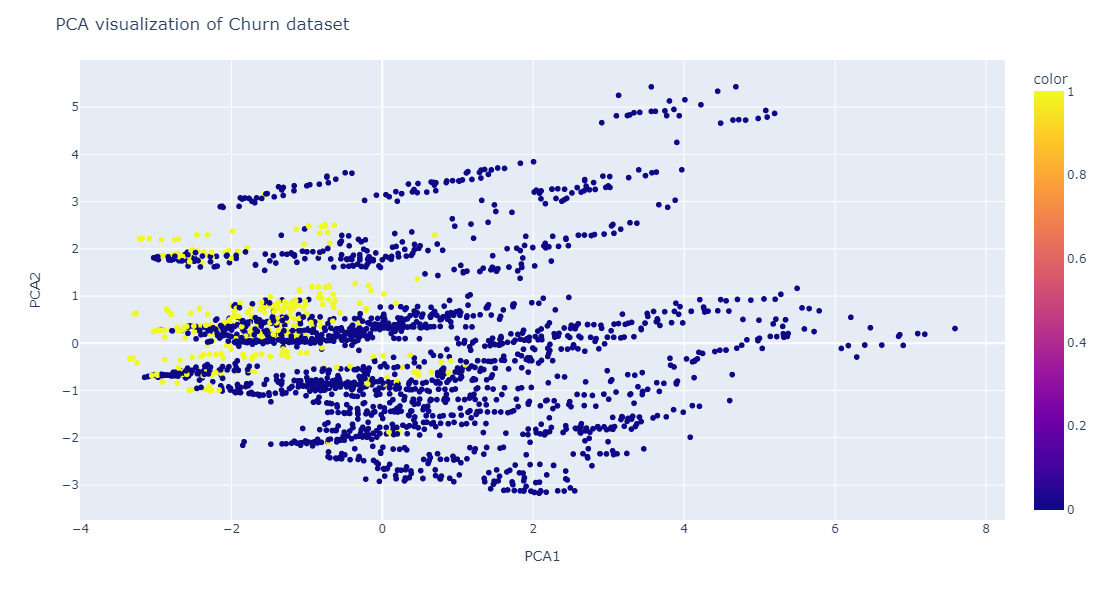

In [32]:
fig = px.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], color=y_train, width=800, height=600)
fig. update_layout(
title="PCA visualization of Churn dataset",xaxis_title="PCA1", yaxis_title="PCA2")
fig.show()

PCA was **not good** at creating clusters. The data in the low dimension looks random. 
It could also mean the features in the dataset are highly skewed, or it does not have a strong correlation structure. 

#### With t-SNE

#### Checking Perplexity vs. Divergence
For the t-SNE algorithm, perplexity is a very important hyperparameter. It controls the effective number of neighbors that each point considers during the dimensionality reduction process. 

We will run a loop to get the KL Divergence metric on various perplexities from 5 to 55 with 5 points gap. After that, we will display the result using the Plotly Express line plot.

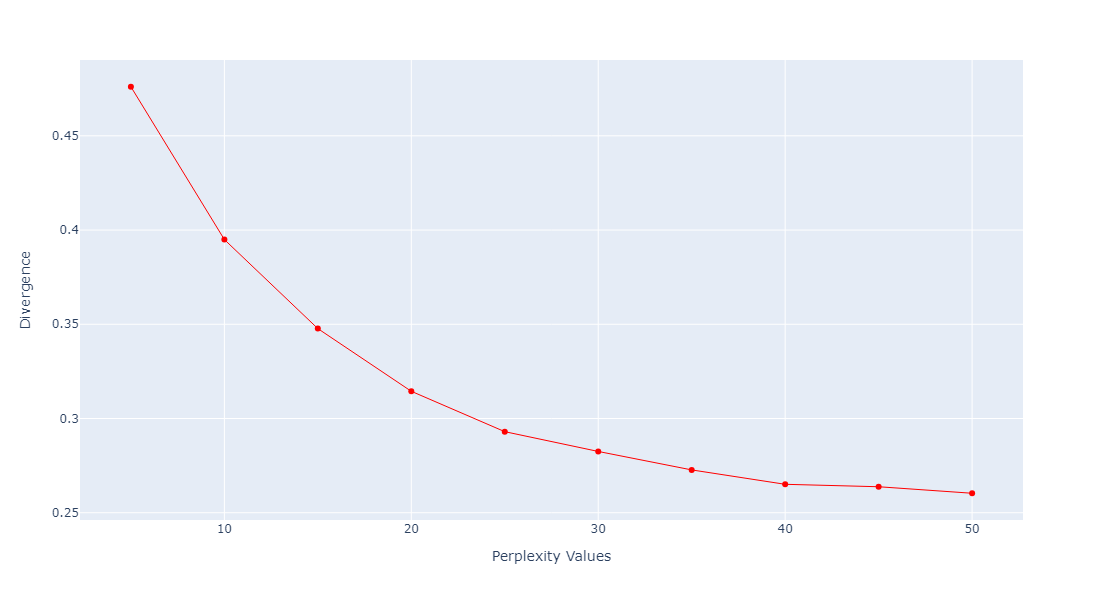

In [33]:
import numpy as np

perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence", width=800, height=600)
fig.update_traces(line_color="red", line_width=1)
fig.show()

The KL Divergence has become constant after 40 perplexity. So, we will use **40 perplexity** in t-SNE algorithm. 

In [38]:
from sklearn.manifold import TSNE

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, perplexity=100, early_exaggeration=12, random_state=1)
X_train_tsne = tsne.fit_transform(X_train)

tsne.kl_divergence_

0.26612329483032227

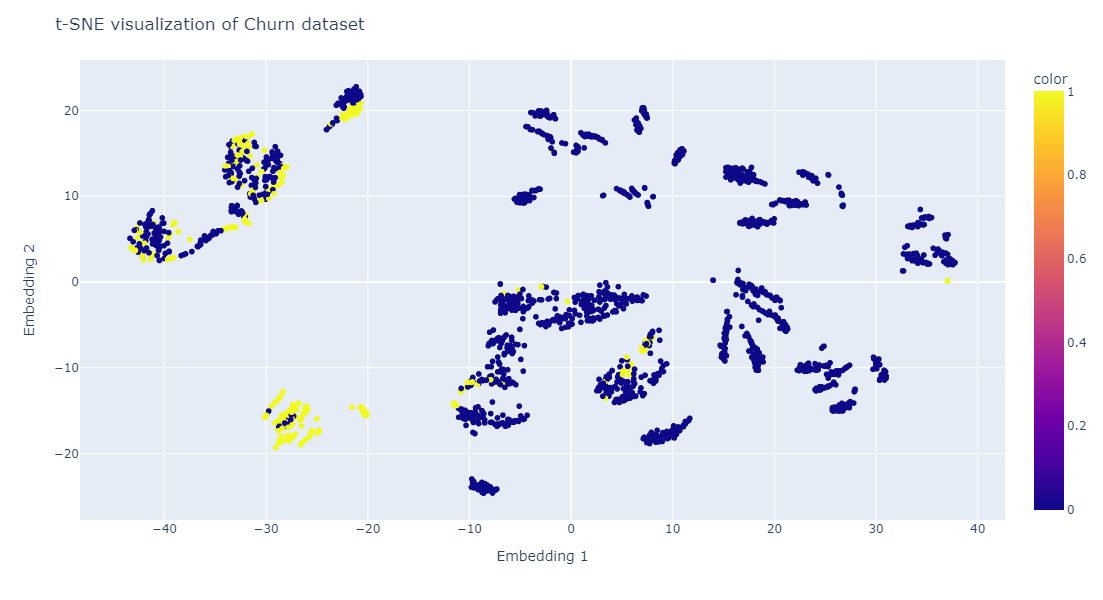

In [39]:
# Plot the t-SNE results
fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=y_train, width=800, height=600)
fig. update_layout(
title="t-SNE visualization of Churn dataset",xaxis_title="Embedding 1", yaxis_title="Embedding 2")
fig.show()

As we can see, we have multiple clusters and sub-clusters. 

#### We can use this information to understand the pattern and come up with a strategy for retaining existing customers :)